Import the 🦸🏾‍♀️"Avengers"🦹🏻 data from the [FiveThirtyEight data repository on GitHub](https://github.com/fivethirtyeight/data/blob/master/avengers/avengers.csv).

In [3]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Rows: 5407 Columns: 1

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): <!DOCTYPE html>


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

Warning message:
“One or more parsing issues, see `problems()` for details”


<!DOCTYPE html>
<chr>
"<html lang=""en"" data-color-mode=""auto"" data-light-theme=""light"" data-dark-theme=""dark"" data-a11y-animated-images=""system"">"
<head>
"<meta charset=""utf-8"">"
"<link rel=""dns-prefetch"" href=""https://github.githubassets.com"">"
"<link rel=""dns-prefetch"" href=""https://avatars.githubusercontent.com"">"
"<link rel=""dns-prefetch"" href=""https://github-cloud.s3.amazonaws.com"">"


In [9]:
avengers = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/avengers/avengers.csv')
avengers |> head(2)

Rows: 173 Columns: 21

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (18): URL, Name/Alias, Current?, Gender, Probationary Introl, Full/Reser...
dbl  (3): Appearances, Year, Years since joining


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,⋯,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NA,Sep-63,1963,52,Full,⋯,NO,NA,NA,NA,NA,NA,NA,NA,NA,Merged with Ultron in Rage of Ultron Vol. 1. A funeral was held.
http://marvel.wikia.com/Janet_van_Dyne_(Earth-616),Janet van Dyne,1165,YES,FEMALE,NA,Sep-63,1963,52,Full,⋯,YES,NA,NA,NA,NA,NA,NA,NA,NA,Dies in Secret Invasion V1:I8. Actually was sent tto Microverse later recovered


Make an ECDF plot 📊 of `Appearances`.

(❗️Hint: combine `arrange`, `mutate` and `row_number`/`rank` to produce a new column to encode with y-position.)

In [24]:
avengers |> 
    select(`Name/Alias`, Appearances) |> 
    arrange(Appearances) |> 
    mutate(rk = row_number() / n()) |> tail(2)

Name/Alias,Appearances,rk
<chr>,<dbl>,<dbl>
Steven Rogers,3458,0.9942197
Peter Benjamin Parker,4333,1.0000000


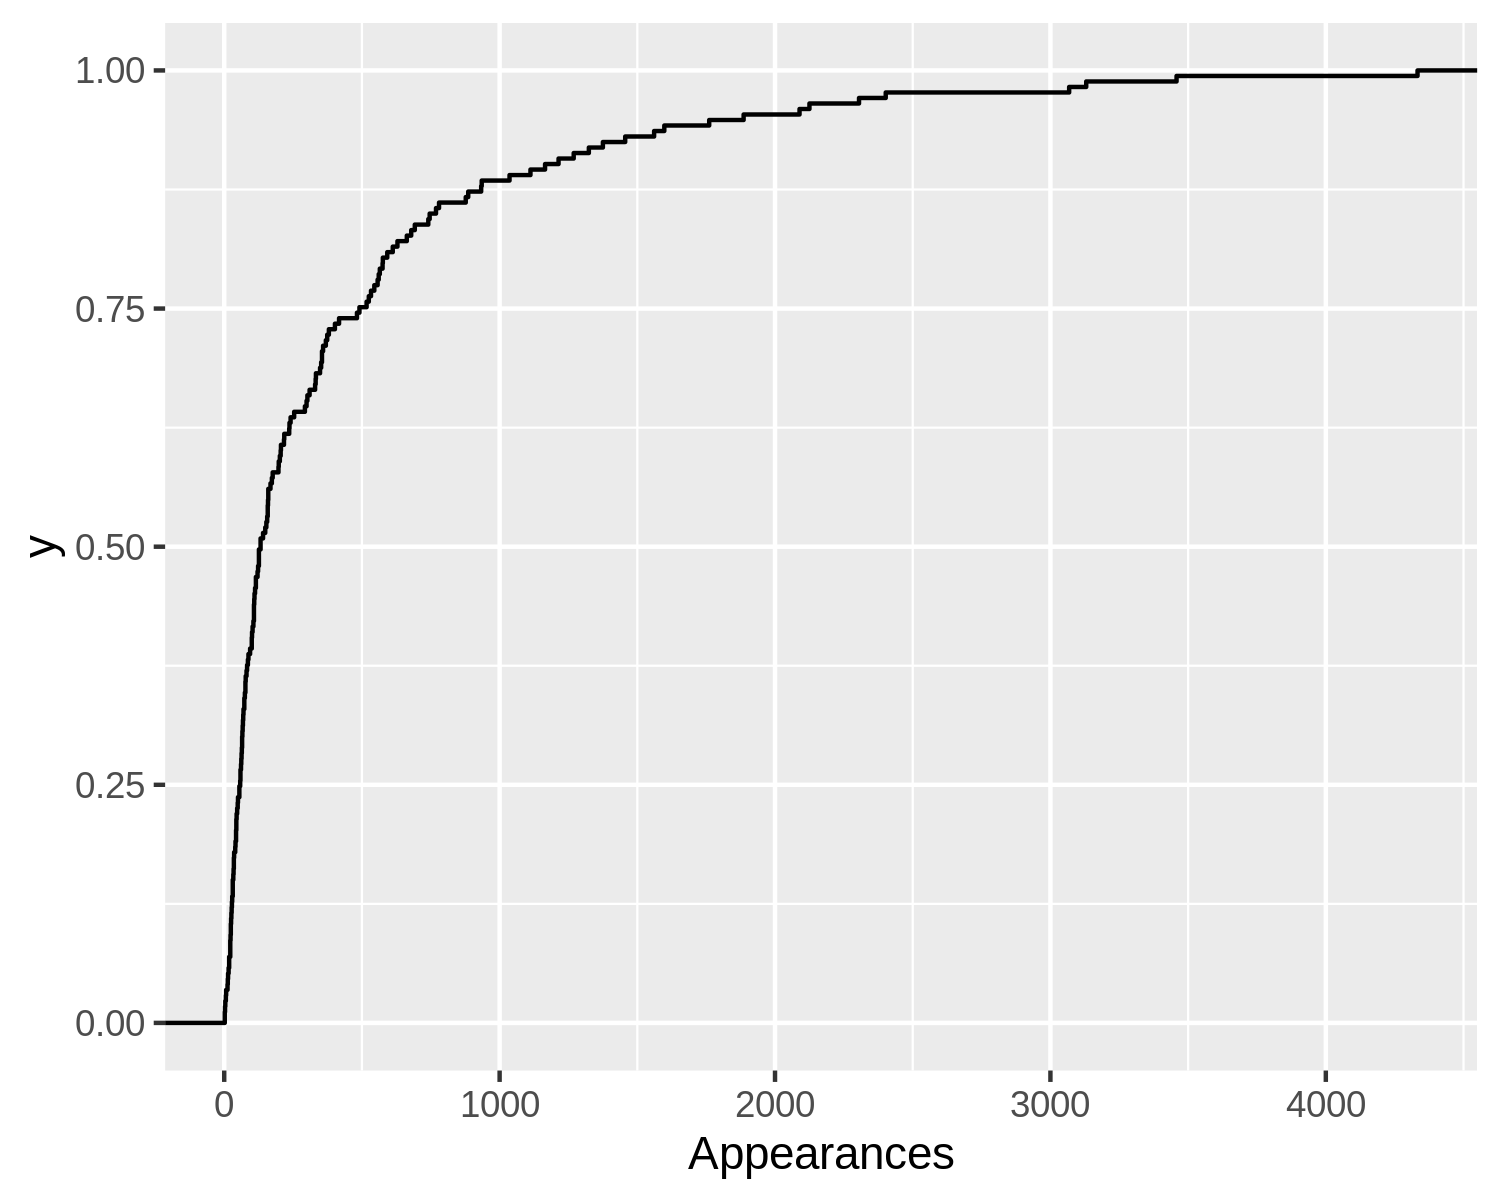

In [19]:
p = ggplot(avengers, aes(x = Appearances)) + stat_ecdf()
p